# Credit Card Fraud Detection

Target variable is already converted to numeric. 
0 - Non-fraud
1 - Fraud

Understanding the Scope of the project. Common questions.

### What type of project? 
Classification
### What is the project solving for? 
The project aims to catch and classify credit card fraud.
### What metrics can we solving for?
We can solve for the accuracy, F1, recall or precision.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')

# DATA EXPLORATION

In [3]:
print("Number of datapoints:", df.shape[0])
print("Number of features:", df.shape[1])

Number of datapoints: 284807
Number of features: 31


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We note there to be all numeric variables in our dataset.

## Summary of Data

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


All columns are in the same range other than the time and amount columns. Therefore, we will need to scale this data.

## Check for NaNs

In [7]:
df.isnull().values.any()

False

## Distribution of Target Variable

In [8]:
print("Number of variables in the Class feature:", df['Class'].count())

Number of variables in the Class feature: 284807


In [9]:
print("Number of non-fraud datapoints:", df['Class'].value_counts()[0])
print("Number of fraud datapoints:", df['Class'].value_counts()[1])

Number of non-fraud datapoints: 284315
Number of fraud datapoints: 492


In [10]:
print('% of non-fraud datapoints: {:.2f}%.'.format((df['Class'].value_counts()/df['Class'].count())[0]*100))
print('% of fraud datapoints: {:.2f}%.'.format((df['Class'].value_counts()/df['Class'].count())[1]*100))

% of non-fraud datapoints: 99.83%.
% of fraud datapoints: 0.17%.


Text(0.5, 1.0, 'Distribution of Target Variable')

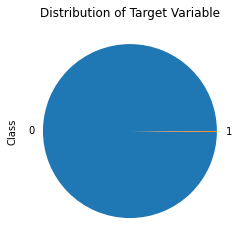

In [11]:
targetValueCounts = df['Class'].value_counts()
ax = targetValueCounts.plot(kind='pie')
ax.set_title("Distribution of Target Variable")

# DATA PRE-PROCESSING

## Scaling Data

RobustScaler was used over StandardScaler or MinMaxScaler as it is less prone to outliers.

![Compared Scalers Image](imgs/comparedScalers.png)

Source: [GeeksforGeeks](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/)

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [13]:
scaled_amount = scaler.fit_transform(df[['Amount']])
flat_list1 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list1)

In [14]:
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## Exported Data for Streamlit App

In [15]:
df.to_csv('creditcard-scaleddata.csv',index=False)

## Time Distribution

Text(0.5, 1.0, 'Distribution of Time Variable')

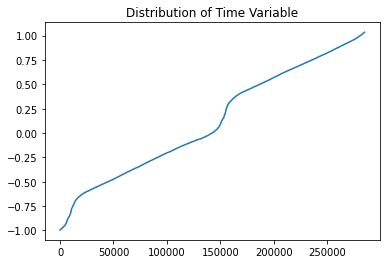

In [16]:
ax = df['scaled_time'].plot()
ax.set_title("Distribution of Time Variable")

## Amount Distribution

Text(0.5, 1.0, 'Distribution of Amount Variable')

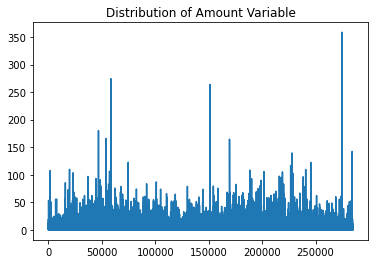

In [17]:
ax = df['scaled_amount'].plot()
ax.set_title("Distribution of Amount Variable")

## Heatmap

Text(0.5, 1.0, 'Heatmap of Correlation')

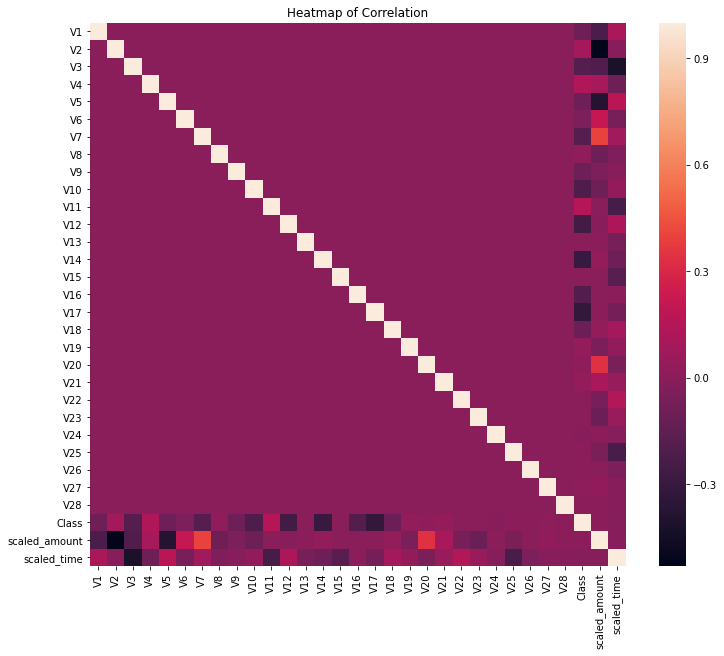

In [18]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

# DATA TRAIN/TEST SPLIT

In [19]:
X = df.drop('Class',axis=1)
y = df['Class']

In [20]:
from sklearn.model_selection import train_test_split

training_features, test_features, training_target, test_target \
= train_test_split(X, y, test_size=0.20, random_state=30)

In [21]:
print("Size of training features:", training_features.shape)
print("Size of training target:", training_target.shape)
print("Size of test features:", test_features.shape)
print("Size of test target:", test_target.shape)

Size of training features: (227845, 30)
Size of training target: (227845,)
Size of test features: (56962, 30)
Size of test target: (56962,)


In [22]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(training_target, return_counts=True)
test_unique_label, test_counts_label = np.unique(test_target, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(training_target))
print(test_counts_label/ len(test_target))

Label Distributions: 

[0.9983322 0.0016678]
[0.99803378 0.00196622]


# SCALING IMBALANCE DATA (RANDOM UNDER SAMPLING) ON TRAINING DATA

Although, I'd perfer to use SMOTE to deal with the imbalance data as Random Under Sampling deletes examples from the majority class which can be valuable for our model.

So, why was Random Under Sampling used? RUS was used as SMOTE would increase our training data set. When doing a 80/20 split, our training data would be (227845, 30) before SMOTE after SMOTE it would be (454930, 30). Due to this my CPU time would be very slow in processing this data, therefore RUS was used. 

## TRAIN/VALIDATION SPLIT

In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .10,
                                                  random_state=12)

In [25]:
rus = RandomUnderSampler(random_state=42)
x_train_res, y_train_res = rus.fit_resample(x_train, y_train)

In [26]:
print("Size before Random Under Sampling")
print("Size of training features:", x_train.shape)
print("Size of training target:", y_train.shape)

print("\nSize after Random Under Sampling")
print("Size of training features:", x_train_res.shape)
print("Size of training target:", y_train_res.shape)

Size before Random Under Sampling
Size of training features: (205060, 30)
Size of training target: (205060,)

Size after Random Under Sampling
Size of training features: (670, 30)
Size of training target: (670,)


In [27]:
(unique, counts) = np.unique(y_train_res, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print("Number of non-fraud datapoints:", frequencies[0][1])
print("Number of fraud datapoints:", frequencies[1][1])

Number of non-fraud datapoints: 335
Number of fraud datapoints: 335


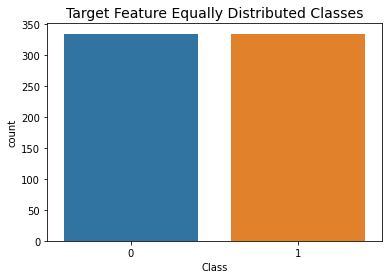

In [28]:
y_train_res_DF = pd.DataFrame(y_train_res)
sns.countplot('Class', data=y_train_res_DF)
plt.title('Target Feature Equally Distributed Classes', fontsize=14)
plt.show()

# ALGORITHM SELECTION & HYPERPARAMETER TUNING WITH GRIDSEARCH CV

In [29]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

To find the needed parameters for modelname.get_params() ex. LogisticRegression().get_params()

In [30]:
model_params = {
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': list(range(2,4,1)), 
            'min_samples_leaf': list(range(5,7,1))
        }
    },
    'svc' : {
        'model': svm.SVC(),
        'params': {
            'C': [0.5, 0.7, 0.9, 1], 
            'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
        }
    },
    'knn' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': list(range(2,5,1)), 
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2'], 
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    }
}
        

In [31]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    #train data with 5 cross validation
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    #training data which is split into train and valid by GridCV
    clf.fit(x_train_res, y_train_res)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    best_estimators[algo] = clf.best_estimator_
    
dfModels = pd.DataFrame(scores,columns=['model','best_score','best_params'])


/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [32]:
dfModels

,model,best_score,best_params
0,decision_tree,0.923881,"{'criterion': 'gini', 'max_depth': 3, 'min_sam..."
1,svc,0.934328,"{'C': 1, 'kernel': 'rbf'}"
2,knn,0.940299,"{'algorithm': 'auto', 'n_neighbors': 3}"
3,logistic_regression,0.935821,"{'C': 0.1, 'penalty': 'l2'}"
4,random_forest,0.946269,"{'criterion': 'gini', 'max_depth': 7, 'max_fea..."


# Saving dfModels into CSV

In [33]:
# dfModels.to_csv('GridSearchCV.csv',index=False)

In [34]:
best_estimators

{'decision_tree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=5),
 'svc': SVC(C=1),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'logistic_regression': LogisticRegression(C=0.1),
 'random_forest': RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=200)}

In [35]:
best_estimators['logistic_regression']

LogisticRegression(C=0.1)

# Decision Tree

In [36]:
descisionTree = best_estimators['decision_tree']
descisionTree.fit(x_train_res, y_train_res)

descisionTree_predVal = descisionTree.predict(x_val)
print("\n\nValidation Data")
print(classification_report(y_val, descisionTree_predVal))
print("Model accuracy:", round(accuracy_score(y_val, descisionTree_predVal)*100,2), "%")



Validation Data
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     22740
           1       0.04      0.82      0.08        45

    accuracy                           0.96     22785
   macro avg       0.52      0.89      0.53     22785
weighted avg       1.00      0.96      0.98     22785

Model accuracy: 96.2 %


# SVM

In [37]:
SVC = best_estimators['svc']
SVC.fit(x_train_res, y_train_res)

SVC_predVal = SVC.predict(x_val)
print("\n\nValidation Data")
print(classification_report(y_val, SVC_predVal))
print("Model accuracy:", round(accuracy_score(y_val, SVC_predVal)*100,2), "%")



Validation Data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22740
           1       0.11      0.82      0.19        45

    accuracy                           0.99     22785
   macro avg       0.55      0.90      0.59     22785
weighted avg       1.00      0.99      0.99     22785

Model accuracy: 98.64 %


# KNN

In [38]:
KNN = best_estimators['knn']
KNN.fit(x_train_res, y_train_res)

KNN_predVal = KNN.predict(x_val)
print("\n\nValidation Data")
print(classification_report(y_val, KNN_predVal))
print("Model accuracy:", round(accuracy_score(y_val, KNN_predVal)*100,2), "%")



Validation Data
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     22740
           1       0.04      0.84      0.08        45

    accuracy                           0.96     22785
   macro avg       0.52      0.90      0.53     22785
weighted avg       1.00      0.96      0.98     22785

Model accuracy: 96.39 %


# Logistic Regression

In [39]:
log_reg = best_estimators['logistic_regression']
log_reg.fit(x_train_res, y_train_res)

log_reg_predVal = log_reg.predict(x_val)
print("\n\nValidation Data")
print(classification_report(y_val, log_reg_predVal))
print("Model accuracy:", round(accuracy_score(y_val, log_reg_predVal)*100,2), "%")



Validation Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22740
           1       0.08      0.84      0.15        45

    accuracy                           0.98     22785
   macro avg       0.54      0.91      0.57     22785
weighted avg       1.00      0.98      0.99     22785

Model accuracy: 98.06 %


# Random Forest

In [40]:
RandForest = best_estimators['random_forest']
RandForest.fit(x_train_res, y_train_res)

RandForestpredVal = RandForest.predict(x_val)
print("\n\nValidation Data")
print(classification_report(y_val, RandForestpredVal))
print("Model accuracy:", round(accuracy_score(y_val, RandForestpredVal)*100,2), "%")



Validation Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22740
           1       0.10      0.87      0.18        45

    accuracy                           0.98     22785
   macro avg       0.55      0.93      0.58     22785
weighted avg       1.00      0.98      0.99     22785

Model accuracy: 98.39 %


# SELECTED ALGORITHM TRAINING (RANDOM FOREST)

In [41]:
from sklearn import tree

# UNDER-SAMPLING TESTING DATA

In [43]:
RandForestpredTest = RandForest.predict(test_features)
print("\n\Test Data")
print(classification_report(test_target, RandForestpredTest))
print("Model accuracy:", round(accuracy_score(test_target, RandForestpredTest)*100,2), "%")


\Test Data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56850
           1       0.11      0.88      0.20       112

    accuracy                           0.99     56962
   macro avg       0.56      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Model accuracy: 98.57 %


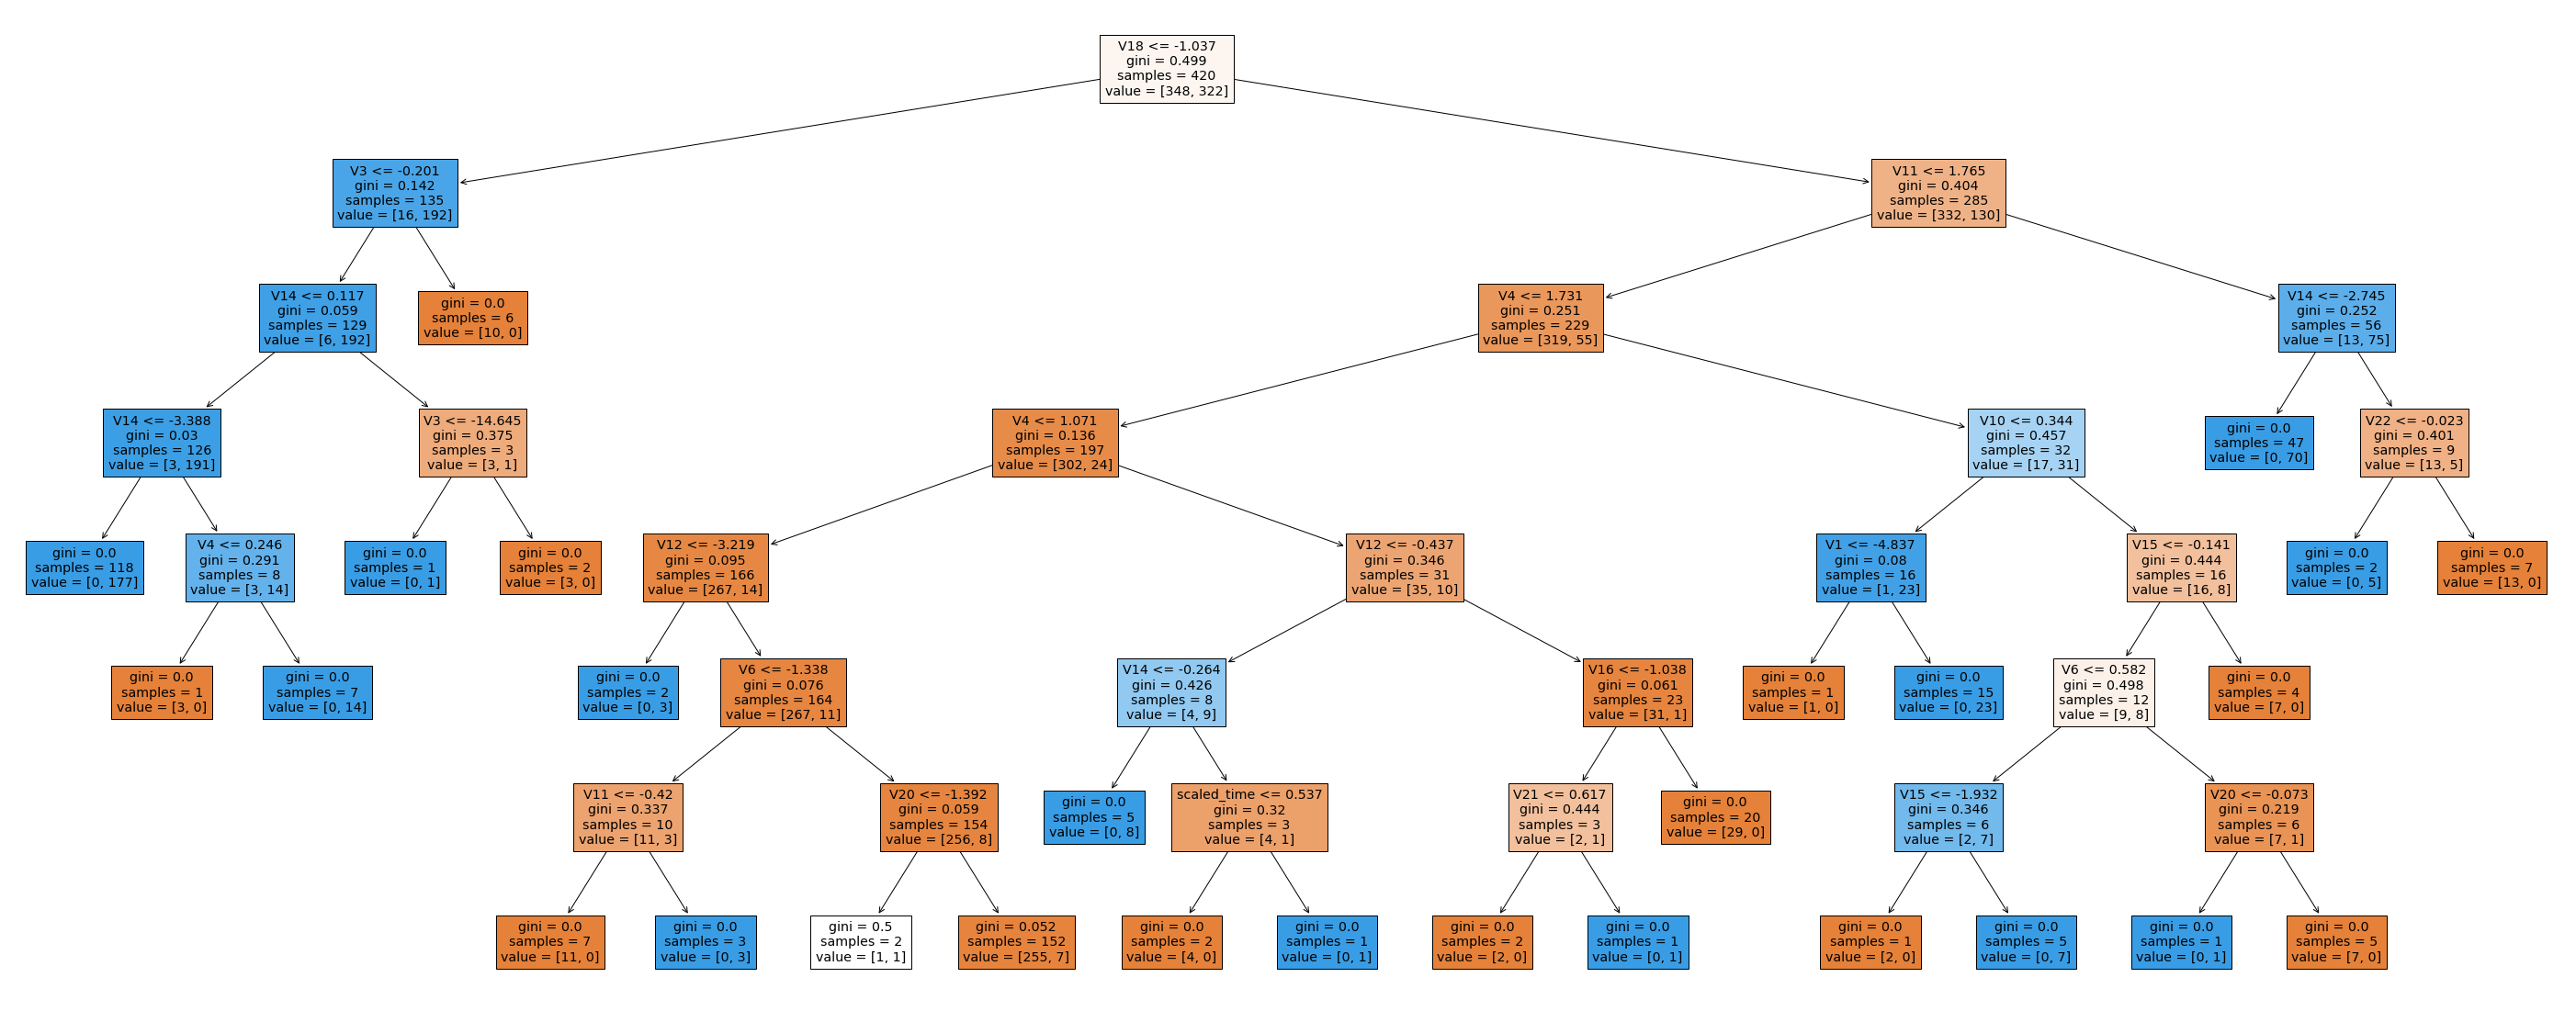

In [44]:
plt.figure(figsize=(50,20))
_ = tree.plot_tree(RandForest.estimators_[0], feature_names=test_features.columns, filled=True)

# NO UNDER-SAMPLING TESTING DATA

In [45]:
RandForest.fit(training_features, training_target)
RandForestpredTest = RandForest.predict(test_features)

print("Test Data")
print(classification_report(test_target, RandForestpredTest))
print("Model accuracy:", round(accuracy_score(test_target, RandForestpredTest)*100,2), "%")

Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.98      0.77      0.86       112

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Model accuracy: 99.95 %


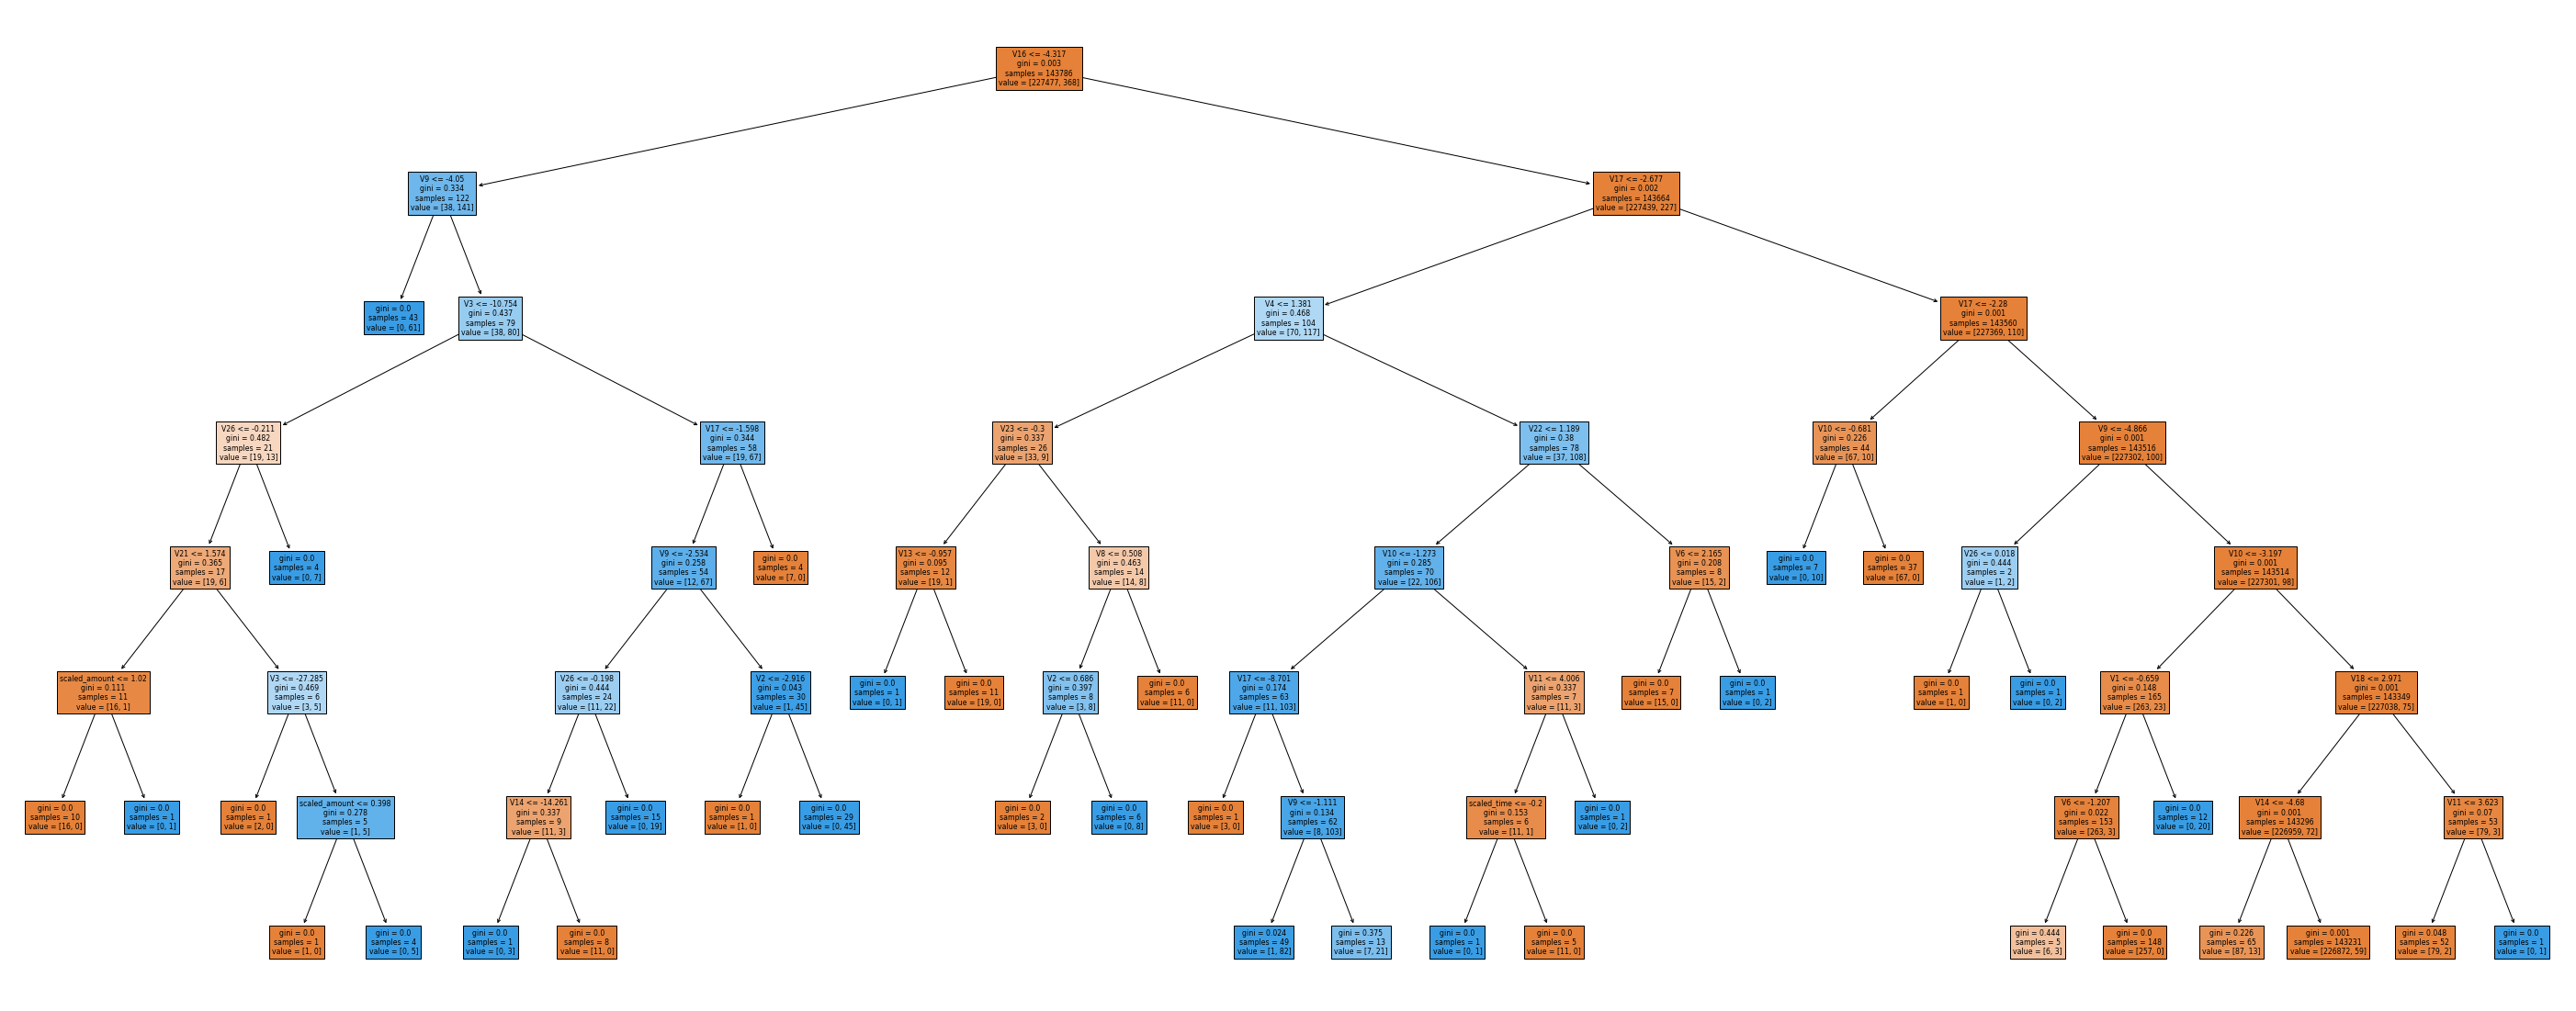

In [46]:
plt.figure(figsize=(50,20))
_ = tree.plot_tree(RandForest.estimators_[0], feature_names=test_features.columns, filled=True)